# <b><span style='color:#F1A424'>AutoML - Binary Classification - Titanic Survival Prediction</span> </b> 

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview - Binary Classification </b>
    


The Titanic dataset is a well-known dataset in the field of machine learning and data science. It contains information about passengers aboard the RMS Titanic, including whether they survived or not. The dataset is often used for predictive modeling and classification tasks. Here are some key details about the Titanic dataset:

**Features**:

- `PassengerId`: Unique identifier for each passenger.
- `Pclass`: Ticket class (1st, 2nd, or 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's gender (male or female).
- `Age`: Passenger's age.
- `SibSp`: Number of siblings or spouses aboard.
- `Parch`: Number of parents or children aboard.
- `Ticket`: Ticket number.
- `Fare`: Fare paid for the ticket.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Target Variable**:

- `Survived`: Binary variable indicating whether the passenger survived (1) or not (0).
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict whether a passenger survived based on the available features.

**Challenges**:

- Missing data in the columns such as `Age`, `Cabin`, and `Embarked`.
- Exploring feature engineering techniques to improve model performance.(`Feature exploration and engineering`)
- Understanding passenger demographics and characteristics that influenced survival.(`Model training`)

**Usecase**:

- Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. 
- It will perform `feature exploration`, `feature engineering`, `data preparation`, `model training` and `model evaluation` on dataset in auto run and at end we will get `leaderboard` containined different models along with their performance. 
- Model will also have `rank` associated with them which indicates which is `best performing model` for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading titanic dataset from example data collection
load_example_data("teradataml", "titanic")

In [5]:
# Fetching in teradata dataframe
titanic = DataFrame.from_table("titanic")

In [6]:
# titanic dataset
titanic.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S


In [7]:
# titanic dataset
titanic.shape

(891, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
titanic_sample = titanic.sample(frac = [0.8, 0.2])

In [9]:
titanic_sample.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sampleid
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S,2
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S,1
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S,1


In [10]:
titanic_sample.describe()

func,passenger,survived,pclass,age,sibsp,parch,fare,sampleid
50%,446,0,3,28,0,0,14.454,1
count,891,891,891,714,891,891,891,891
mean,446,0.384,2.309,29.679,0.523,0.382,32.204,1.2
min,1,0,1,0,0,0,0,1
max,891,1,3,80,8,6,512.329,2
75%,668.5,1,3,38,1,0,31,1
25%,223.5,0,2,20,0,0,7.91,1
std,257.354,0.487,0.836,14.536,1.103,0.806,49.693,0.4


In [11]:
# Fetching train and test data
titanic_train= titanic_sample[titanic_sample['sampleid'] == 1].drop('sampleid', axis=1)
titanic_test = titanic_sample[titanic_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
titanic_train.shape

(713, 12)

In [13]:
# test data shape
titanic_test.shape

(178, 12)

In [14]:
# train dataset
titanic_train.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.05,None,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S


In [15]:
# test dataset
titanic_test.head()

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,None,C
42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27,1,0,11668,21.0,None,S
47,0,3,"Lennon, Mr. Denis",male,None,1,0,370371,15.5,None,Q
65,0,1,"Stewart, Mr. Albert A",male,None,0,0,PC 17605,27.7208,None,C
68,0,3,"Crease, Mr. Ernest James",male,19,0,0,S.P. 3464,8.1583,None,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26.0,None,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [19]:
# Creating AutoClassifier Instance 
# Excluding knn model from default model list for training
# Using early stopping timer criteria with value 300 sec  

aml = AutoClassifier(exclude='knn',
                    verbose=2,
                    max_runtime_secs=300)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 713
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
fare,FLOAT,713,0,None,11,702,0,0.0,100.0
passenger,INTEGER,713,0,None,0,713,0,0.0,100.0
cabin,VARCHAR(20) CHARACTER SET LATIN,163,550,0,None,None,None,77.13884992987377,22.86115007012623
sibsp,INTEGER,713,0,None,486,227,0,0.0,100.0
survived,INTEGER,713,0,None,432,281,0,0.0,100.0
pclass,INTEGER,713,0,None,0,713,0,0.0,100.0
age,INTEGER,571,142,None,6,565,0,19.91584852734923,80.08415147265077
ticket,VARCHAR(20) CHARACTER SET LATIN,713,0,0,None,None,None,0.0,100.0
name,VARCHAR(1000) CHARACTER SET LATIN,713,0,0,None,None,None,0.0,100.0
embarked,VARCHAR(20) CHARACTER SET LATIN,711,2,0,None,None,None,0.2805049088359046,99.71949509116409



Statistics of Data:


func,passenger,survived,pclass,age,sibsp,parch,fare
50%,446,0,3,28,0,0,14.454
count,713,713,713,571,713,713,713
mean,444.771,0.394,2.309,29.226,0.544,0.37,32.599
min,1,0,1,0,0,0,0
max,891,1,3,74,8,6,512.329
75%,669,1,3,38,1,0,31.275
25%,220,0,2,20,0,0,7.896
std,260.734,0.489,0.841,14.148,1.159,0.774,51.452



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
name                      713       
sex                       2         
ticket                    572       
cabin                     128       
embarked                  3         

Futile columns in dataset:


ColumnName
name
ticket



Target Column Distribution:


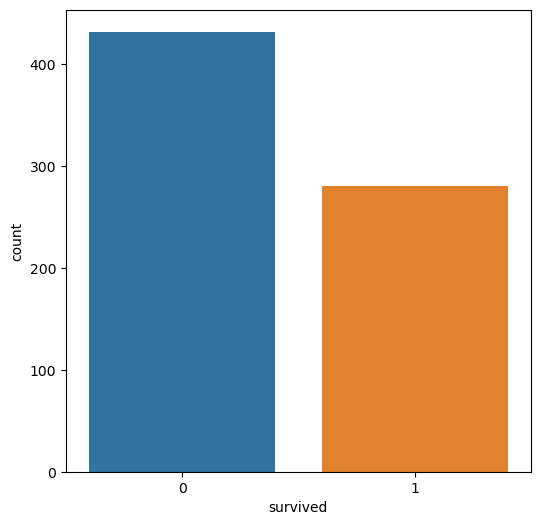

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0       fare          12.762973
1        age          20.617111
2      parch          23.562412
3      sibsp           5.610098


Analysis completed. No action taken.                                                    


['ticket', 'name']


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
326,1,1,female,36,0,0,135.6333,C32,C,13
734,0,2,male,23,0,0,13.0,None,S,14
61,0,3,male,22,0,0,7.2292,None,C,22
265,0,3,female,None,0,0,7.75,None,Q,9
570,1,3,male,32,0,0,7.8542,None,S,15
835,0,3,male,18,0,0,8.3,None,S,23
469,0,3,male,None,0,0,7.725,None,Q,8
183,0,3,male,9,4,2,31.3875,None,S,16
122,0,3,male,None,0,0,8.05,None,S,11
591,0,3,male,35,0,0,7.125,None,S,19


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


embarked: 2
age: 142
cabin: 550


['embarked']


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
80,1,3,female,30,0,0,12.475,None,S,12
40,1,3,female,14,1,0,11.2417,None,C,10
120,0,3,female,2,4,2,31.275,None,S,18
122,0,3,male,None,0,0,8.05,None,S,11
570,1,3,male,32,0,0,7.8542,None,S,15
835,0,3,male,18,0,0,8.3,None,S,23
469,0,3,male,None,0,0,7.725,None,Q,8
183,0,3,male,9,4,2,31.3875,None,S,16
326,1,1,female,36,0,0,135.6333,C32,C,13
305,0,3,male,None,0,0,8.05,None,S,21


['cabin']


passenger,survived,pclass,sex,age,sibsp,parch,fare,embarked,id
265,0,3,female,None,0,0,7.75,Q,9
40,1,3,female,14,1,0,11.2417,C,10
120,0,3,female,2,4,2,31.275,S,18
734,0,2,male,23,0,0,13.0,S,14
326,1,1,female,36,0,0,135.6333,C,13
305,0,3,male,None,0,0,8.05,S,21
570,1,3,male,32,0,0,7.8542,S,15
835,0,3,male,18,0,0,8.3,S,23
122,0,3,male,None,0,0,8.05,S,11
591,0,3,male,35,0,0,7.125,S,19


age: mean


passenger,survived,pclass,sex,age,sibsp,parch,fare,embarked,id
265,0,3,female,29,0,0,7.75,Q,9
40,1,3,female,14,1,0,11.2417,C,10
120,0,3,female,2,4,2,31.275,S,18
734,0,2,male,23,0,0,13.0,S,14
80,1,3,female,30,0,0,12.475,S,12
242,1,3,female,29,1,0,15.5,Q,20
326,1,1,female,36,0,0,135.6333,C,13
305,0,3,male,29,0,0,8.05,S,21
570,1,3,male,32,0,0,7.8542,S,15
835,0,3,male,18,0,0,8.3,S,23


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171996517916859"'% - 5/18


['sex', 'embarked']


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
751,1,2,1,0,4,1,1,23.0,0,0,1,26
791,0,3,0,1,29,0,0,7.75,0,1,0,42
383,0,3,0,1,32,0,0,7.925,0,0,1,50
648,1,1,0,1,56,0,0,35.5,1,0,0,58
158,0,3,0,1,30,0,0,8.05,0,0,1,74
423,0,3,0,1,29,0,0,7.875,0,0,1,82
831,1,3,1,0,15,1,0,14.4542,1,0,0,66
57,1,2,1,0,21,0,0,10.5,0,0,1,34
120,0,3,1,0,2,4,2,31.275,0,0,1,18
40,1,3,1,0,14,1,0,11.2417,1,0,0,10


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
40,1,3,1,0,14,1,0,11.2417,1,0,0,10
122,0,3,0,1,29,0,0,8.05,0,0,1,11
591,0,3,0,1,35,0,0,7.125,0,0,1,19
734,0,2,0,1,23,0,0,13.0,0,0,1,14
265,0,3,1,0,29,0,0,7.75,0,1,0,9
530,0,2,0,1,23,2,1,11.5,0,0,1,17
80,1,3,1,0,30,0,0,12.475,0,0,1,12
242,1,3,1,0,29,1,0,15.5,0,1,0,20
326,1,1,1,0,36,0,0,135.6333,1,0,0,13
305,0,3,0,1,29,0,0,8.05,0,0,1,21


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
509,0,3,0,1,28,0,0,22.525,0,0,1,24
387,0,3,0,1,1,5,2,46.9,0,0,1,27
465,0,3,0,1,29,0,0,8.05,0,0,1,123
162,1,2,1,0,40,0,0,15.75,0,0,1,31
795,0,3,0,1,25,0,0,7.8958,0,0,1,30
116,0,3,0,1,21,0,0,7.925,0,0,1,126
101,0,3,1,0,28,0,0,7.8958,0,0,1,25
156,0,1,0,1,51,0,1,61.3792,1,0,0,121
38,0,3,0,1,21,0,0,8.05,0,0,1,28
55,0,1,0,1,65,0,1,61.9792,1,0,0,124


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0      sibsp           5.625879
1       fare          12.517581
2      parch          23.628692
3        age           6.188467


['sibsp', 'age']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991031494560"'% - 7/18


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
427,1,2,1,0,28,1,0,26.0,0,0,1,39
671,1,2,1,0,40,1,1,39.0,0,0,1,63
528,0,1,0,1,29,0,0,221.7792,0,0,1,71
833,0,3,0,1,29,0,0,7.2292,1,0,0,87
78,0,3,0,1,29,0,0,8.05,0,0,1,103
322,0,3,0,1,27,0,0,7.8958,0,0,1,111
282,0,3,0,1,28,0,0,7.8542,0,0,1,95
223,0,3,0,1,51,0,0,8.05,0,0,1,47
835,0,3,0,1,18,0,0,8.3,0,0,1,23
570,1,3,0,1,32,0,0,7.8542,0,0,1,15


['fare', 'parch']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171995717412601"'% - 7/18


passenger,survived,pclass,sex_0,sex_1,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,id
427,1,2,1,0,28,1,0,26.0,0,0,1,39
671,1,2,1,0,40,1,0,39.0,0,0,1,63
528,0,1,0,1,29,0,0,13.0,0,0,1,71
833,0,3,0,1,29,0,0,7.2292,1,0,0,87
78,0,3,0,1,29,0,0,8.05,0,0,1,103
322,0,3,0,1,27,0,0,7.8958,0,0,1,111
282,0,3,0,1,28,0,0,7.8542,0,0,1,95
223,0,3,0,1,51,0,0,8.05,0,0,1,47
835,0,3,0,1,18,0,0,8.3,0,0,1,23
570,1,3,0,1,32,0,0,7.8542,0,0,1,15


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171995039770623"'% - 8/18
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171996257049757"'


['sex_0', 'embarked_2', 'passenger', 'embarked_1', 'age', 'sibsp', 'fare', 'pclass', 'sex_1', 'embarked_0']


['passenger', 'age', 'sibsp', 'fare', 'pclass']


sex_0,embarked_2,embarked_1,id,sex_1,embarked_0,survived,passenger,age,sibsp,fare,pclass
1,0,0,10,0,1,1,0.043820224719101124,0.20833333333333334,0.5,0.18376297507151615,1.0
1,1,0,12,0,0,1,0.08876404494382023,0.5416666666666666,0.0,0.20392317123007764,1.0
1,0,0,13,0,1,1,0.3651685393258427,0.6666666666666666,0.0,0.21250510829587252,0.0
0,1,0,14,1,0,0,0.8235955056179776,0.3958333333333333,0.0,0.21250510829587252,0.5
0,1,0,17,1,0,0,0.5943820224719101,0.3958333333333333,1.0,0.18798528810788723,0.5
0,1,0,19,1,0,0,0.6629213483146067,0.6458333333333334,0.0,0.11646914589293013,1.0
0,1,0,15,1,0,1,0.6393258426966292,0.5833333333333334,0.0,0.12838904781364938,1.0
0,1,0,11,1,0,0,0.13595505617977527,0.5208333333333334,0.0,0.13158970167552106,1.0
1,0,1,9,0,0,0,0.2966292134831461,0.5208333333333334,0.0,0.12668573763792398,1.0
0,0,1,8,1,0,0,0.5258426966292135,0.5208333333333334,0.0,0.12627707396812424,1.0


sex_0,embarked_2,embarked_1,id,sex_1,embarked_0,survived,passenger,age,sibsp,fare,pclass
1,0,1,186,0,0,1,0.12247191011235956,0.5208333333333334,0.5,0.39476910502656315,1.0
1,1,0,242,0,0,0,0.2573033707865168,0.5208333333333334,1.5,0.41629260318757666,1.0
0,1,0,368,1,0,1,0.019101123595505618,0.5208333333333334,0.0,0.21250510829587252,0.5
1,1,0,458,0,0,0,0.4707865168539326,0.125,0.0,0.39476910502656315,1.0
1,0,1,562,0,0,0,0.7640449438202247,0.5208333333333334,0.0,0.13302002451982017,1.0
0,1,0,552,1,0,0,0.8325842696629213,0.6666666666666666,0.5,1.2889252145484267,0.0
0,1,0,448,1,0,1,0.449438202247191,0.7291666666666666,0.0,0.12954638332652227,1.0
0,0,0,208,1,1,1,0.6730337078651686,0.9375,0.5,0.9305958316305681,0.0
0,0,0,184,1,1,0,0.30674157303370786,0.6875,0.0,0.4854924397221087,0.0
1,1,0,544,0,0,1,0.3056179775280899,0.7708333333333334,0.0,0.31875766244380876,0.5


['sex_0', 'passenger', 'age', 'pclass', 'sex_1', 'fare']


['r_passenger', 'r_age', 'r_pclass', 'r_fare']


id,r_sex_0,survived,r_sex_1,r_passenger,r_age,r_pclass,r_fare
10,1,1,0,0.043820224719101124,0.20833333333333334,1.0,0.18376297507151615
12,1,1,0,0.08876404494382023,0.5416666666666666,1.0,0.20392317123007764
13,1,1,0,0.3651685393258427,0.6666666666666666,0.0,0.21250510829587252
14,0,0,1,0.8235955056179776,0.3958333333333333,0.5,0.21250510829587252
17,0,0,1,0.5943820224719101,0.3958333333333333,0.5,0.18798528810788723
19,0,0,1,0.6629213483146067,0.6458333333333334,1.0,0.11646914589293013
15,0,1,1,0.6393258426966292,0.5833333333333334,1.0,0.12838904781364938
11,0,0,1,0.13595505617977527,0.5208333333333334,1.0,0.13158970167552106
9,1,0,0,0.2966292134831461,0.5208333333333334,1.0,0.12668573763792398
8,0,0,1,0.5258426966292135,0.5208333333333334,1.0,0.12627707396812424


id,r_sex_0,survived,r_sex_1,r_passenger,r_age,r_pclass,r_fare
186,1,1,0,0.12247191011235956,0.5208333333333334,1.0,0.39476910502656315
242,1,0,0,0.2573033707865168,0.5208333333333334,1.0,0.41629260318757666
368,0,1,1,0.019101123595505618,0.5208333333333334,0.5,0.21250510829587252
458,1,0,0,0.4707865168539326,0.125,1.0,0.39476910502656315
562,1,0,0,0.7640449438202247,0.5208333333333334,1.0,0.13302002451982017
552,0,0,1,0.8325842696629213,0.6666666666666666,0.0,1.2889252145484267
448,0,1,1,0.449438202247191,0.7291666666666666,1.0,0.12954638332652227
208,0,1,1,0.6730337078651686,0.9375,0.0,0.9305958316305681
184,0,0,1,0.30674157303370786,0.6875,0.0,0.4854924397221087
544,1,1,0,0.3056179775280899,0.7708333333333334,0.5,0.31875766244380876


['passenger', 'pclass', 'age', 'sibsp', 'fare']


sex_0,embarked_2,embarked_1,parch,id,sex_1,embarked_0,survived,passenger,pclass,age,sibsp,fare
0,0,1,0,8,1,0,0,0.5258426966292135,1.0,0.5208333333333334,0.0,0.12627707396812424
1,1,0,0,12,0,0,1,0.08876404494382023,1.0,0.5416666666666666,0.0,0.20392317123007764
1,0,1,0,20,0,0,1,0.27078651685393257,1.0,0.5208333333333334,0.5,0.25337147527584797
0,1,0,0,15,1,0,1,0.6393258426966292,1.0,0.5833333333333334,0.0,0.12838904781364938
1,0,0,0,10,0,1,1,0.043820224719101124,1.0,0.20833333333333334,0.5,0.18376297507151615
1,1,0,0,34,0,0,1,0.06292134831460675,0.5,0.3541666666666667,0.0,0.17163874131589701
1,0,0,0,13,0,1,1,0.3651685393258427,0.0,0.6666666666666666,0.0,0.21250510829587252
0,1,0,0,21,1,0,0,0.3415730337078652,1.0,0.5208333333333334,0.0,0.13158970167552106
0,1,0,0,14,1,0,0,0.8235955056179776,0.5,0.3958333333333333,0.0,0.21250510829587252
0,0,0,0,22,1,1,0,0.06741573033707865,1.0,0.375,0.0,0.1181724560686555


sex_0,embarked_2,embarked_1,parch,id,sex_1,embarked_0,survived,passenger,pclass,age,sibsp,fare
0,1,0,2,27,1,0,0,0.4337078651685393,1.0,-0.0625,2.5,0.76665304454434
1,1,0,0,25,0,0,0,0.11235955056179775,1.0,0.5,0.0,0.12906906416019617
0,0,0,1,121,1,1,0,0.17415730337078653,0.0,0.9791666666666666,0.0,1.0033379648549243
0,1,0,0,28,1,0,0,0.04157303370786517,1.0,0.3541666666666667,0.0,0.13158970167552106
1,1,0,0,31,0,0,1,0.18089887640449437,0.5,0.75,0.0,0.25745811197384555
1,1,0,0,127,0,0,0,0.015730337078651686,1.0,0.20833333333333334,0.0,0.12838904781364938
0,1,0,0,30,1,0,0,0.8921348314606742,1.0,0.4375,0.0,0.12906906416019617
0,1,0,0,126,1,0,0,0.12921348314606743,1.0,0.3541666666666667,0.0,0.12954638332652227
0,0,0,0,29,1,1,0,0.8213483146067416,1.0,0.14583333333333334,0.0,0.30711074785451575
1,1,0,1,125,0,0,1,0.5382022471910113,1.0,-0.041666666666666664,0.0,0.20085819370657948


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']


response_column : survived                                                                                                                            
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : survived
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171997619879480"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991592723990"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991994917756"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991938869951"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991450864430"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992613156843"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991460118391"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171993429747814"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991231193736"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991697796735"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992702902655"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991881059383"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_4,rfe,0.783217,0.783217,0.783217,0.783217,0.772727,0.770936,0.771789,0.782581,0.783217,0.782860
1,2,XGBOOST_2,pca,0.783217,0.783217,0.783217,0.783217,0.773480,0.767755,0.770228,0.781638,0.783217,0.782071
2,3,GLM_1,rfe,0.776224,0.776224,0.776224,0.776224,0.765213,0.768370,0.766626,0.777855,0.776224,0.776886
3,4,GLM_4,rfe,0.769231,0.769231,0.769231,0.769231,0.829342,0.711720,0.719924,0.808405,0.769231,0.745399
4,5,DECISIONFOREST_1,rfe,0.748252,0.748252,0.748252,0.748252,0.739517,0.748563,0.741566,0.757568,0.748252,0.750577
5,6,DECISIONFOREST_0,lasso,0.741259,0.741259,0.741259,0.741259,0.737759,0.749179,0.737093,0.759455,0.741259,0.744267
6,7,GLM_3,lasso,0.734266,0.734266,0.734266,0.734266,0.721704,0.724343,0.722868,0.736127,0.734266,0.735052
7,8,XGBOOST_3,lasso,0.727273,0.727273,0.727273,0.727273,0.726526,0.737685,0.723815,0.749680,0.727273,0.730514
8,9,GLM_0,lasso,0.727273,0.727273,0.727273,0.727273,0.723756,0.734503,0.722882,0.745558,0.727273,0.730444
9,10,XGBOOST_1,rfe,0.713287,0.713287,0.713287,0.713287,0.709753,0.719828,0.708671,0.731661,0.713287,0.716620


In [21]:
# Fitting train data 

aml.fit(titanic_train, 'survived')

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [22]:
help(aml.leaderboard)

Help on method leaderboard in module teradataml.automl:

leaderboard() method of teradataml.automl.AutoClassifier instance
    DESCRIPTION:
        Function displays leaderboard.
    
    RETURNS:
        Pandas DataFrame with Leaderboard information.
    
    RAISES:
        TeradataMlException.
    
    EXAMPLES:
        # Create an instance of the AutoML called "automl_obj" 
        # by referring "AutoML() or AutoRegressor() or AutoClassifier()" method.
        # Perform fit() operation on the "automl_obj".
        # Generate leaderboard using leaderboard() method on "automl_obj".
        >>> automl_obj.leaderboard()



In [23]:
# Fetching leaderboard

aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_4,rfe,0.783217,0.783217,0.783217,0.783217,0.772727,0.770936,0.771789,0.782581,0.783217,0.782860
1,2,XGBOOST_2,pca,0.783217,0.783217,0.783217,0.783217,0.773480,0.767755,0.770228,0.781638,0.783217,0.782071
2,3,GLM_1,rfe,0.776224,0.776224,0.776224,0.776224,0.765213,0.768370,0.766626,0.777855,0.776224,0.776886
3,4,GLM_4,rfe,0.769231,0.769231,0.769231,0.769231,0.829342,0.711720,0.719924,0.808405,0.769231,0.745399
4,5,DECISIONFOREST_1,rfe,0.748252,0.748252,0.748252,0.748252,0.739517,0.748563,0.741566,0.757568,0.748252,0.750577
5,6,DECISIONFOREST_0,lasso,0.741259,0.741259,0.741259,0.741259,0.737759,0.749179,0.737093,0.759455,0.741259,0.744267
6,7,GLM_3,lasso,0.734266,0.734266,0.734266,0.734266,0.721704,0.724343,0.722868,0.736127,0.734266,0.735052
7,8,XGBOOST_3,lasso,0.727273,0.727273,0.727273,0.727273,0.726526,0.737685,0.723815,0.749680,0.727273,0.730514
8,9,GLM_0,lasso,0.727273,0.727273,0.727273,0.727273,0.723756,0.734503,0.722882,0.745558,0.727273,0.730444
9,10,XGBOOST_1,rfe,0.713287,0.713287,0.713287,0.713287,0.709753,0.719828,0.708671,0.731661,0.713287,0.716620


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [25]:
# Fetching best performing model
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,SVM_4,rfe,0.783217,0.783217,0.783217,0.783217,0.772727,0.770936,0.771789,0.782581,0.783217,0.78286


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [29]:
# Fetching prediction and metrics on test data
prediction = aml.predict(titanic_test)

Data Transformation started ...


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
692,1,3,female,4,0,1,13.4167,None,C,15
244,0,3,male,22,0,0,7.125,None,S,14
488,0,1,male,58,0,0,29.7,B37,C,22
444,1,2,female,28,0,0,13.0,None,S,13
341,1,2,male,2,1,1,26.0,F2,S,8
381,1,1,female,42,0,0,227.525,None,C,16
631,1,1,male,80,0,0,30.0,A23,S,10
200,0,2,female,24,0,0,13.0,None,S,18
730,0,3,female,25,1,0,7.925,None,S,11
566,0,3,male,24,2,0,24.15,None,S,19


sex,passenger,age,parch,sibsp,fare,pclass,embarked,cabin,id,survived
male,244,22,0,0,7.125,3,S,None,14,0
male,341,2,1,1,26.0,2,S,F2,8,1
female,381,42,0,0,227.525,1,C,None,16,1
female,692,4,1,0,13.4167,3,C,None,15,1
male,345,36,0,0,13.0,2,S,None,12,0
male,177,None,1,3,25.4667,3,S,None,20,0
male,261,None,0,0,7.75,3,Q,None,9,0
male,747,16,1,1,20.25,3,S,None,17,0
male,631,80,0,0,30.0,1,S,A23,10,1
female,200,24,0,0,13.0,2,S,None,18,0


sex,passenger,age,parch,sibsp,fare,pclass,embarked,id,survived
male,631,80,0,0,30.0,1,S,10,1
male,261,None,0,0,7.75,3,Q,9,0
male,747,16,1,1,20.25,3,S,17,0
male,345,36,0,0,13.0,2,S,12,0
female,444,28,0,0,13.0,2,S,13,1
female,709,22,0,0,151.55,1,S,21,1
female,692,4,1,0,13.4167,3,C,15,1
male,753,33,0,0,9.5,3,S,23,0
female,730,25,0,1,7.925,3,S,11,0
male,566,24,0,2,24.15,3,S,19,0


sex,passenger,age,parch,sibsp,fare,pclass,embarked,id,survived
male,261,29,0,0,7.75,3,Q,9,0
male,345,36,0,0,13.0,2,S,12,0
male,177,29,1,3,25.4667,3,S,20,0
female,444,28,0,0,13.0,2,S,13,1
male,244,22,0,0,7.125,3,S,14,0
male,488,58,0,0,29.7,1,C,22,0
female,730,25,0,1,7.925,3,S,11,0
male,566,24,0,2,24.15,3,S,19,0
female,692,4,1,0,13.4167,3,C,15,1
male,753,33,0,0,9.5,3,S,23,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171991851489687"'⫾⫾⫾⫾｜ 50% - 5/10


sex_0,sex_1,passenger,age,parch,sibsp,fare,pclass,embarked_0,embarked_1,embarked_2,id,survived
1,0,363,45,1,0,14.4542,3,1,0,0,120,0
1,0,394,23,0,1,113.275,1,1,0,0,41,1
1,0,178,50,0,0,28.7125,1,1,0,0,73,0
1,0,298,2,2,1,151.55,1,0,0,1,81,0
1,0,231,35,0,1,83.475,1,0,0,1,113,1
1,0,574,29,0,0,7.75,3,0,1,0,161,1
0,1,68,19,0,0,8.1583,3,0,0,1,33,0
0,1,243,29,0,0,10.5,2,0,0,1,57,0
0,1,426,29,0,0,7.25,3,0,0,1,65,0
0,1,807,39,0,0,0.0,1,0,0,1,89,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171997129665164"'⫾⫾⫾⫾｜ 60% - 6/10


id,sex_0,embarked_2,passenger,embarked_1,age,sibsp,fare,pclass,sex_1,embarked_0,survived
129,0,0,189,1,40,1,15.5,3,1,0,0
153,0,1,513,0,36,0,26.2875,1,1,0,1
10,0,1,631,0,80,0,30.0,1,1,0,1
26,0,1,688,0,19,0,10.1708,3,1,0,0
58,0,0,175,0,56,0,30.6958,1,1,1,0
74,0,1,415,0,44,0,7.925,3,1,0,1
120,1,0,363,0,45,0,14.4542,3,0,1,0
41,1,0,394,0,23,1,113.275,1,0,1,1
73,1,0,178,0,50,0,28.7125,1,0,1,0
81,1,1,298,0,2,1,151.55,1,0,0,0


sex_0,embarked_2,embarked_1,id,sex_1,embarked_0,survived,passenger,age,sibsp,fare,pclass
1,0,0,73,0,1,0,0.19887640449438201,0.9583333333333334,0.0,0.46935022476501836,0.0
1,1,0,113,0,0,1,0.25842696629213485,0.6458333333333334,0.5,1.3645279934613812,0.0
1,0,1,161,0,0,1,0.6438202247191012,0.5208333333333334,0.0,0.12668573763792398,1.0
1,1,0,18,0,0,0,0.22359550561797753,0.4166666666666667,0.0,0.21250510829587252,0.5
1,1,0,90,0,0,1,0.895505617977528,0.5625,0.0,0.14194196975888843,1.0
1,1,0,106,0,0,1,0.7044943820224719,0.3541666666666667,0.0,1.2743489987740089,0.0
0,1,0,65,1,0,0,0.47752808988764045,0.5208333333333334,0.0,0.11851246424192889,1.0
0,1,0,121,1,0,0,0.898876404494382,0.625,0.0,0.21250510829587252,0.5
0,0,1,129,1,0,0,0.21123595505617979,0.75,0.5,0.25337147527584797,1.0
0,0,0,137,1,1,0,0.9651685393258427,0.5208333333333334,0.0,0.1181724560686555,1.0


id,sex_0,passenger,age,pclass,sex_1,fare,survived
129,0,189,40,3,1,15.5,0
153,0,513,36,1,1,26.2875,1
10,0,631,80,1,1,30.0,1
26,0,688,19,3,1,10.1708,0
58,0,175,56,1,1,30.6958,0
74,0,415,44,3,1,7.925,1
120,1,363,45,3,0,14.4542,0
41,1,394,23,1,0,113.275,1
73,1,178,50,1,0,28.7125,0
81,1,298,2,1,0,151.55,0


id,r_sex_0,survived,r_sex_1,r_passenger,r_age,r_pclass,r_fare
129,0,0,1,0.21123595505617979,0.75,1.0,0.25337147527584797
153,0,1,1,0.5752808988764045,0.6666666666666666,0.0,0.42970984879444224
10,0,1,1,0.7078651685393258,1.5833333333333333,0.0,0.4903964037597058
26,0,0,1,0.7719101123595505,0.3125,1.0,0.16625745811197384
58,0,0,1,0.19550561797752808,1.0833333333333333,0.0,0.5017703310175725
74,0,1,1,0.4651685393258427,0.8333333333333334,1.0,0.12954638332652227
120,1,0,0,0.4067415730337079,0.8541666666666666,1.0,0.23627625664078464
41,1,1,0,0.44157303370786516,0.3958333333333333,0.0,1.8516550878626892
73,1,0,0,0.19887640449438201,0.9583333333333334,0.0,0.46935022476501836
81,1,0,0,0.33370786516853934,-0.041666666666666664,0.0,2.477319166326114


sex_0,embarked_2,embarked_1,parch,id,sex_1,embarked_0,survived,passenger,pclass,age,sibsp,fare
1,0,0,0,73,0,1,0,0.19887640449438201,0.0,0.9583333333333334,0.0,0.46935022476501836
1,1,0,0,113,0,0,1,0.25842696629213485,0.0,0.6458333333333334,0.5,1.3645279934613812
1,0,1,0,161,0,0,1,0.6438202247191012,1.0,0.5208333333333334,0.0,0.12668573763792398
1,1,0,0,18,0,0,0,0.22359550561797753,0.5,0.4166666666666667,0.0,0.21250510829587252
1,1,0,0,90,0,0,1,0.895505617977528,1.0,0.5625,0.0,0.14194196975888843
1,1,0,0,106,0,0,1,0.7044943820224719,0.0,0.3541666666666667,0.0,1.2743489987740089
0,1,0,0,65,1,0,0,0.47752808988764045,1.0,0.5208333333333334,0.0,0.11851246424192889
0,1,0,0,121,1,0,0,0.898876404494382,0.5,0.625,0.0,0.21250510829587252
0,0,1,1,129,1,0,0,0.21123595505617979,1.0,0.75,0.5,0.25337147527584797
0,0,0,0,137,1,1,0,0.9651685393258427,1.0,0.5208333333333334,0.0,0.1181724560686555


,id,col_0,col_1,col_2,col_3,col_4,col_5,survived
0,120,1.175201,0.477988,0.418392,-0.473877,-0.141956,-0.113623,0
1,65,-0.650752,-0.139318,0.206993,-0.130791,-0.034019,-0.088585,0
2,41,1.493270,0.577666,-0.827554,-0.019405,0.200078,0.430361,1
3,121,-0.564852,-0.071902,-0.264289,0.195824,-0.350172,-0.032228,0
4,73,1.381992,0.588906,-0.459535,-0.127200,0.148732,-0.380236,0
5,129,-0.182995,0.596656,0.727480,0.723756,0.657882,0.273500,0
6,81,0.958100,-0.680921,-1.077025,0.215892,0.398988,0.503003,0
7,137,-0.084939,1.118202,0.326643,-0.262599,-0.543302,0.111301,0
8,113,0.888067,-0.667201,-0.870701,0.185843,0.417576,0.243020,1
9,153,-0.449641,-0.021948,-0.714795,0.316525,-0.004296,-0.227224,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : SVM_4 
Feature Selection Method : rfe

Prediction : 
    id  prediction      prob  survived
0  129           0  0.999927         0
1  153           0  0.984293         1
2   10           0  0.994747         1
3   26           0  0.999948         0
4   58           0  0.982209         0
5   74           0  0.999967         1
6  120           1  0.557205         0
7   41           1  0.999988         1
8   73           1  0.997952         0
9   81           1  0.999999         0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2       18       45   0.714286  0.737705  0.725806       61
0               0  CLASS_1       99       16   0.860870  0.846154  0.85

AUC,GINI
0.7351828499369484,0.47036569987389676


threshold_value,tpr,fpr
0.04081632653061224,0.7377049180327869,0.15384615384615385
0.08163265306122448,0.7377049180327869,0.15384615384615385
0.1020408163265306,0.7377049180327869,0.15384615384615385
0.12244897959183673,0.7377049180327869,0.15384615384615385
0.16326530612244897,0.7377049180327869,0.15384615384615385
0.18367346938775508,0.7377049180327869,0.15384615384615385
0.14285714285714285,0.7377049180327869,0.15384615384615385
0.061224489795918366,0.7377049180327869,0.15384615384615385
0.02040816326530612,0.7377049180327869,0.15384615384615385
0.0,1.0,1.0



Confusion Matrix : 


array([[99, 18],
       [16, 45]], dtype=int64)

In [30]:
# Printing prediction
prediction.head()

id,prediction,prob,survived
10,0,0.9947474416088203,1
12,0,0.9992566668011971,0
13,1,0.9543920304992404,1
14,0,0.9999303827770332,0
16,1,0.9999999624529204,1
17,0,0.9999092096440753,0
15,1,0.7018505841266862,1
11,0,0.5122883158209208,0
9,0,0.9999413761200997,0
8,0,0.9962497058658779,1


In [31]:
# Fetching prediction and metrics on test data
prediction = aml.predict(titanic_test, rank=3)

Data Transformation started ...


passenger,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,id
345,0,2,male,36,0,0,13.0,None,S,12
244,0,3,male,22,0,0,7.125,None,S,14
488,0,1,male,58,0,0,29.7,B37,C,22
692,1,3,female,4,0,1,13.4167,None,C,15
261,0,3,male,None,0,0,7.75,None,Q,9
747,0,3,male,16,1,1,20.25,None,S,17
444,1,2,female,28,0,0,13.0,None,S,13
709,1,1,female,22,0,0,151.55,None,S,21
341,1,2,male,2,1,1,26.0,F2,S,8
381,1,1,female,42,0,0,227.525,None,C,16


sex,passenger,age,parch,sibsp,fare,pclass,embarked,cabin,id,survived
male,261,None,0,0,7.75,3,Q,None,9,0
female,444,28,0,0,13.0,2,S,None,13,1
female,709,22,0,0,151.55,1,S,None,21,1
male,345,36,0,0,13.0,2,S,None,12,0
female,692,4,1,0,13.4167,3,C,None,15,1
male,753,33,0,0,9.5,3,S,None,23,0
male,631,80,0,0,30.0,1,S,A23,10,1
female,200,24,0,0,13.0,2,S,None,18,0
male,244,22,0,0,7.125,3,S,None,14,0
male,488,58,0,0,29.7,1,C,B37,22,0


sex,passenger,age,parch,sibsp,fare,pclass,embarked,id,survived
female,444,28,0,0,13.0,2,S,13,1
male,345,36,0,0,13.0,2,S,12,0
male,177,None,1,3,25.4667,3,S,20,0
female,692,4,1,0,13.4167,3,C,15,1
male,261,None,0,0,7.75,3,Q,9,0
male,747,16,1,1,20.25,3,S,17,0
male,244,22,0,0,7.125,3,S,14,0
male,488,58,0,0,29.7,1,C,22,0
female,730,25,0,1,7.925,3,S,11,0
male,566,24,0,2,24.15,3,S,19,0


sex,passenger,age,parch,sibsp,fare,pclass,embarked,id,survived
female,730,25,0,1,7.925,3,S,11,0
female,692,4,1,0,13.4167,3,C,15,1
male,753,33,0,0,9.5,3,S,23,0
male,244,22,0,0,7.125,3,S,14,0
male,261,29,0,0,7.75,3,Q,9,0
male,747,16,1,1,20.25,3,S,17,0
male,345,36,0,0,13.0,2,S,12,0
male,177,29,1,3,25.4667,3,S,20,0
female,444,28,0,0,13.0,2,S,13,1
female,709,22,0,0,151.55,1,S,21,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992083907571"'⫾⫾⫾⫾｜ 50% - 5/10


sex_0,sex_1,passenger,age,parch,sibsp,fare,pclass,embarked_0,embarked_1,embarked_2,id,survived
0,1,426,29,0,0,7.25,3,0,0,1,65,0
0,1,801,34,0,0,13.0,2,0,0,1,121,0
0,1,189,40,1,1,15.5,3,0,1,0,129,0
0,1,860,29,0,0,7.2292,3,1,0,0,137,0
0,1,513,36,0,0,26.2875,1,0,0,1,153,1
0,1,95,59,0,0,7.25,3,0,0,1,45,0
1,0,178,50,0,0,28.7125,1,1,0,0,73,0
1,0,639,41,5,0,39.6875,3,0,0,1,105,0
1,0,231,35,0,1,83.475,1,0,0,1,113,1
1,0,574,29,0,0,7.75,3,0,1,0,161,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171992876018119"'⫾⫾⫾⫾｜ 60% - 6/10


id,sex_0,embarked_2,passenger,embarked_1,age,sibsp,fare,pclass,sex_1,embarked_0,survived
29,1,1,484,0,63,0,9.5875,3,0,0,1
61,1,1,459,0,50,0,10.5,2,0,0,1
69,1,0,112,0,14,1,14.4542,3,0,1,0
77,1,1,173,0,1,1,11.1333,3,0,0,1
133,1,1,601,0,24,2,27.0,2,0,0,1
141,1,1,191,0,32,0,13.0,2,0,0,1
65,0,1,426,0,29,0,7.25,3,1,0,0
121,0,1,801,0,34,0,13.0,2,1,0,0
129,0,0,189,1,40,1,15.5,3,1,0,0
137,0,0,860,0,29,0,7.2292,3,1,1,0


sex_0,embarked_2,embarked_1,id,sex_1,embarked_0,survived,passenger,age,sibsp,fare,pclass
1,1,0,29,0,0,1,0.5426966292134832,1.2291666666666667,0.0,0.15672251736820597,1.0
1,1,0,61,0,0,1,0.5146067415730337,0.9583333333333334,0.0,0.17163874131589701,0.5
1,0,0,69,0,1,0,0.12471910112359551,0.20833333333333334,0.5,0.23627625664078464,1.0
1,1,0,77,0,0,1,0.19325842696629214,-0.0625,0.5,0.1819910093992644,1.0
1,1,0,133,0,0,1,0.6741573033707865,0.4166666666666667,1.0,0.4413567633837352,0.5
1,1,0,141,0,0,1,0.21348314606741572,0.5833333333333334,0.0,0.21250510829587252,0.5
0,1,0,65,1,0,0,0.47752808988764045,0.5208333333333334,0.0,0.11851246424192889,1.0
0,1,0,121,1,0,0,0.898876404494382,0.625,0.0,0.21250510829587252,0.5
0,0,1,129,1,0,0,0.21123595505617979,0.75,0.5,0.25337147527584797,1.0
0,0,0,137,1,1,0,0.9651685393258427,0.5208333333333334,0.0,0.1181724560686555,1.0


id,sex_0,passenger,age,pclass,sex_1,fare,survived
29,1,484,63,3,0,9.5875,1
61,1,459,50,2,0,10.5,1
69,1,112,14,3,0,14.4542,0
77,1,173,1,3,0,11.1333,1
133,1,601,24,2,0,27.0,1
141,1,191,32,2,0,13.0,1
65,0,426,29,3,1,7.25,0
121,0,801,34,2,1,13.0,0
129,0,189,40,3,1,15.5,0
137,0,860,29,3,1,7.2292,0


id,r_sex_0,survived,r_sex_1,r_passenger,r_age,r_pclass,r_fare
29,1,1,0,0.5426966292134832,1.2291666666666667,1.0,0.15672251736820597
61,1,1,0,0.5146067415730337,0.9583333333333334,0.5,0.17163874131589701
69,1,0,0,0.12471910112359551,0.20833333333333334,1.0,0.23627625664078464
77,1,1,0,0.19325842696629214,-0.0625,1.0,0.1819910093992644
133,1,1,0,0.6741573033707865,0.4166666666666667,0.5,0.4413567633837352
141,1,1,0,0.21348314606741572,0.5833333333333334,0.5,0.21250510829587252
65,0,0,1,0.47752808988764045,0.5208333333333334,1.0,0.11851246424192889
121,0,0,1,0.898876404494382,0.625,0.5,0.21250510829587252
129,0,0,1,0.21123595505617979,0.75,1.0,0.25337147527584797
137,0,0,1,0.9651685393258427,0.5208333333333334,1.0,0.1181724560686555


sex_0,embarked_2,embarked_1,parch,id,sex_1,embarked_0,survived,passenger,pclass,age,sibsp,fare
1,1,0,0,29,0,0,1,0.5426966292134832,1.0,1.2291666666666667,0.0,0.15672251736820597
1,1,0,0,61,0,0,1,0.5146067415730337,0.5,0.9583333333333334,0.0,0.17163874131589701
1,0,0,0,69,0,1,0,0.12471910112359551,1.0,0.20833333333333334,0.5,0.23627625664078464
1,1,0,1,77,0,0,1,0.19325842696629214,1.0,-0.0625,0.5,0.1819910093992644
1,1,0,1,133,0,0,1,0.6741573033707865,0.5,0.4166666666666667,1.0,0.4413567633837352
1,1,0,0,141,0,0,1,0.21348314606741572,0.5,0.5833333333333334,0.0,0.21250510829587252
0,1,0,0,65,1,0,0,0.47752808988764045,1.0,0.5208333333333334,0.0,0.11851246424192889
0,1,0,0,121,1,0,0,0.898876404494382,0.5,0.625,0.0,0.21250510829587252
0,0,1,1,129,1,0,0,0.21123595505617979,1.0,0.75,0.5,0.25337147527584797
0,0,0,0,137,1,1,0,0.9651685393258427,1.0,0.5208333333333334,0.0,0.1181724560686555


,id,col_0,col_1,col_2,col_3,col_4,col_5,survived
0,113,0.888067,-0.667201,-0.870701,0.185843,0.417576,0.243020,1
1,65,-0.650752,-0.139318,0.206993,-0.130791,-0.034019,-0.088585,0
2,21,0.901235,-0.665812,-1.091069,0.429056,-0.175537,0.227729,1
3,121,-0.564852,-0.071902,-0.264289,0.195824,-0.350172,-0.032228,0
4,29,0.579286,-0.761495,0.234777,-0.116128,-0.167798,-0.105211,1
5,129,-0.182995,0.596656,0.727480,0.723756,0.657882,0.273500,0
6,37,0.678636,-0.702837,-0.158230,0.083485,-0.361516,-0.108294,1
7,137,-0.084939,1.118202,0.326643,-0.262599,-0.543302,0.111301,0
8,61,0.681983,-0.707296,-0.141851,0.016591,-0.114271,-0.223567,1
9,153,-0.449641,-0.021948,-0.714795,0.316525,-0.004296,-0.227224,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : GLM_1 
Feature Selection Method : rfe

Prediction : 
    id  prediction      prob  survived
0   29           1  0.994067         1
1   61           1  0.998070         1
2   69           1  0.970676         0
3   77           1  0.952277         1
4  133           1  0.997008         1
5  141           1  0.996458         1
6   65           0  0.998521         0
7  121           0  0.989729         0
8  129           0  0.997519         0
9  137           0  0.998365         0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       99       13   0.883929  0.846154  0.864629      117
1               1  CLASS_2       18       48   0.727273  0.786885  0.75

AUC,GINI
0.7559899117276166,0.5119798234552333


threshold_value,tpr,fpr
0.04081632653061224,0.7868852459016393,0.15384615384615385
0.08163265306122448,0.7868852459016393,0.15384615384615385
0.1020408163265306,0.7868852459016393,0.15384615384615385
0.12244897959183673,0.7868852459016393,0.15384615384615385
0.16326530612244897,0.7868852459016393,0.15384615384615385
0.18367346938775508,0.7868852459016393,0.15384615384615385
0.14285714285714285,0.7868852459016393,0.15384615384615385
0.061224489795918366,0.7868852459016393,0.15384615384615385
0.02040816326530612,0.7868852459016393,0.15384615384615385
0.0,1.0,1.0



Confusion Matrix : 


array([[99, 18],
       [13, 48]], dtype=int64)

In [32]:
# Printing prediction
prediction.head()

id,prediction,prob,survived
10,0,0.7480094368648507,1
12,0,0.99011671450998,0
13,1,0.9961798277049525,1
14,0,0.9988840851472894,0
16,1,0.9999973345461209,1
17,0,0.9985862739601001,0
15,1,0.9634504073409231,1
11,1,0.9792641864759154,0
9,0,0.9985595188650748,0
8,0,0.995665420212405,1


In [33]:
remove_context()

True